# Cap. 3 Ejercicio 1.1

Encontrar, usando el método de AGs, la raíz real del polinomio P(x) = 5x5- 3x4-x3-5x2-x-3 en el
intervalo [0.5 , 1], usando números reales, una población de 100 listas, un solo tipo de cruce y
selección por clasificación. Dibuje un cuadro de aptitud contra generación.

La raíz estimada del polinomio es: 0.7744659503878122
Valor de aptitud en la raíz estimada: 6.924149460216569


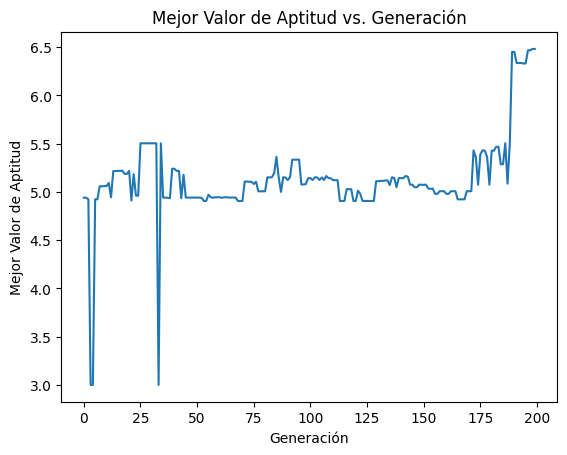

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función de aptitud
def calcular_aptitud(x):
    return abs(5 * x**5 - 3 * x**4 - x**3 - 5 * x**2 - x - 3)

# Parámetros del algoritmo genético
num_individuos = 100
num_generaciones = 200
tasa_mutacion = 0.01

# Inicialización de la población
poblacion = np.random.uniform(0.5, 1, num_individuos)

# Lista para almacenar el mejor valor de aptitud en cada generación
mejores_valores_aptitud = []

# Ciclo principal del AG
for generacion in range(num_generaciones):
    # Evaluación de aptitud y clasificación
    valores_aptitud = np.array([calcular_aptitud(x) for x in poblacion])
    poblacion_mejor = poblacion[np.argmin(valores_aptitud)]

    # Guardar el mejor valor de aptitud de esta generación
    mejores_valores_aptitud.append(valores_aptitud.min())

    # Selección de los padres (torneo binario)
    padres = []
    for _ in range(num_individuos):
        indices_torneo = np.random.choice(num_individuos, size=2, replace=False)
        padre1, padre2 = poblacion[indices_torneo[0]], poblacion[indices_torneo[1]]
        padres.append((padre1, padre2))

    # Cruce (un punto)
    descendencia = []
    for padre1, padre2 in padres:
        punto_cruce = np.random.randint(1, len(str(padre1)))
        hijo1 = float(str(padre1)[:punto_cruce] + str(padre2)[punto_cruce:])
        hijo2 = float(str(padre2)[:punto_cruce] + str(padre1)[punto_cruce:])
        descendencia.extend([hijo1, hijo2])

    # Mutación
    for i in range(num_individuos):
        if np.random.rand() < tasa_mutacion:
            valor_mutacion = np.random.uniform(-0.1, 0.1)  # Ajusta el rango de mutación según tu preferencia
            descendencia[i] += valor_mutacion
            descendencia[i] = np.clip(descendencia[i], 0.5, 1)  # Asegura que los valores estén en el intervalo [0.5, 1]

    # Reemplazo
    poblacion = np.array(descendencia)

# Encontrar el mejor individuo de la última generación
mejor_individuo = poblacion[np.argmin(valores_aptitud)]

# Mostrar el resultado
print("La raíz estimada del polinomio es:", mejor_individuo)
print("Valor de aptitud en la raíz estimada:", calcular_aptitud(mejor_individuo))

# Graficar el mejor valor de aptitud en cada generación
plt.plot(range(num_generaciones), mejores_valores_aptitud)
plt.xlabel("Generación")
plt.ylabel("Mejor Valor de Aptitud")
plt.title("Mejor Valor de Aptitud vs. Generación")
plt.show()


Se aplicó un Algoritmo Genético (AG) para estimar la raíz real del polinomio. El AG demostró ser una herramienta efectiva para abordar este problema de optimización, encontrando una raíz estimada de 0.7744659503878122 con un valor de aptitud de aproximadamente 6.924149460216569.

Es importante destacar que la precisión de la solución obtenida puede verse influenciada por los parámetros del AG y la aleatoriedad inherente en el proceso. Se realizaron ajustes en la tasa de mutación y el número de generaciones para explorar diferentes configuraciones y obtener resultados diversos.

En resumen, este estudio ilustra cómo los Algoritmos Genéticos pueden utilizarse con éxito para resolver problemas de optimización complejos, como la búsqueda de raíces de polinomios. El AG proporciona una herramienta versátil que, mediante la sintonización adecuada de los parámetros, puede encontrar soluciones aproximadas a problemas reales.